In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost imbalanced-learn shap streamlit


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/home/asus/Desktop/churn_project/customer_churn.csv')  

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


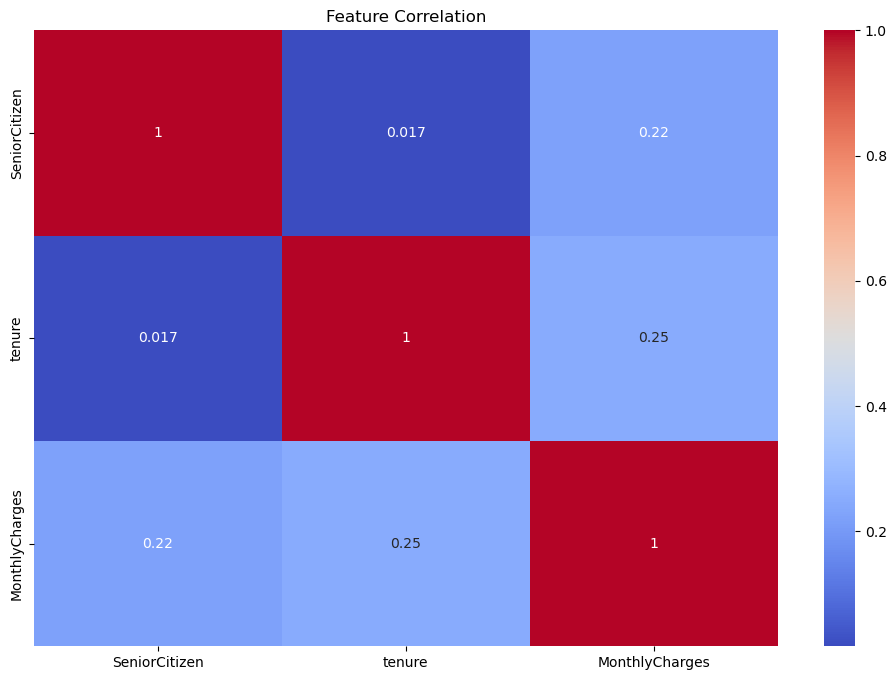

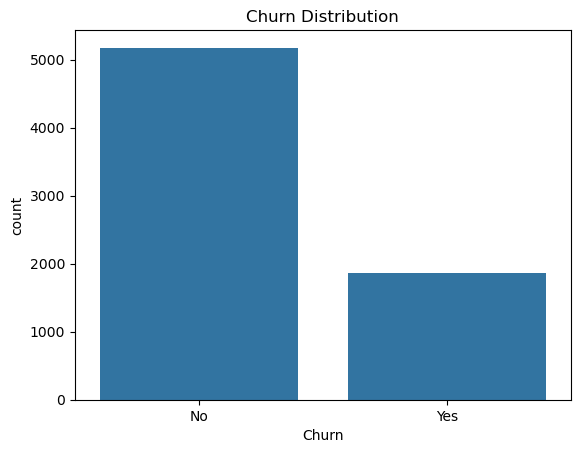

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Churn Distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


In [7]:
data_encoded = pd.get_dummies(data.sample(n=500, random_state=42), drop_first=True)


In [8]:
print(data_encoded.shape)  # (rows, columns)


(500, 1024)


In [9]:
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0148-DCDOS,customerID_0187-WZNAB,customerID_0201-MIBOL,...,TotalCharges_96.85,TotalCharges_966.55,TotalCharges_970.45,TotalCharges_973.45,TotalCharges_973.95,TotalCharges_978,TotalCharges_982.95,TotalCharges_996.45,TotalCharges_997.65,Churn_Yes
185,0,1,24.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2715,0,41,25.25,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3825,0,52,19.35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1807,0,1,76.35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
132,0,67,50.55,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0,63,109.20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3805,1,1,71.65,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
228,0,30,89.90,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,0,23,73.75,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


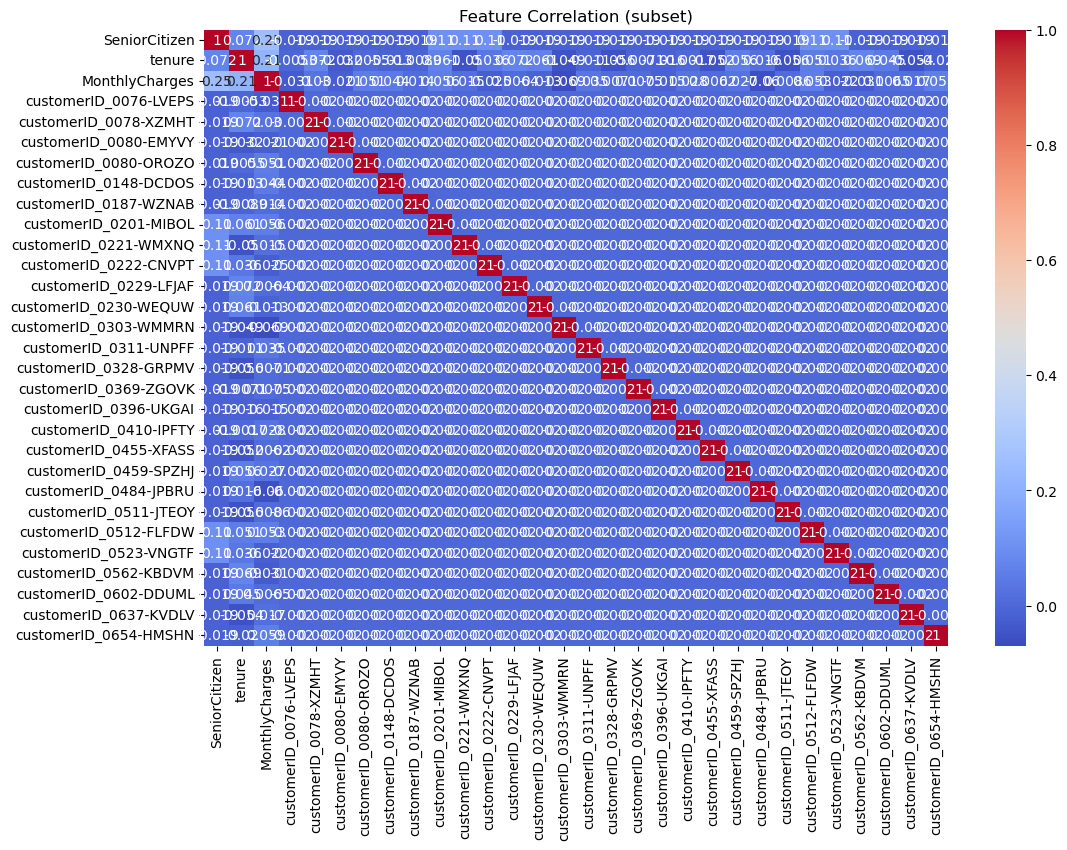

In [10]:
# Limit to 30 columns max (arbitrary)
limited_data = data_encoded.iloc[:, :30]  
plt.figure(figsize=(12, 8))
sns.heatmap(limited_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation (subset)')
plt.show()

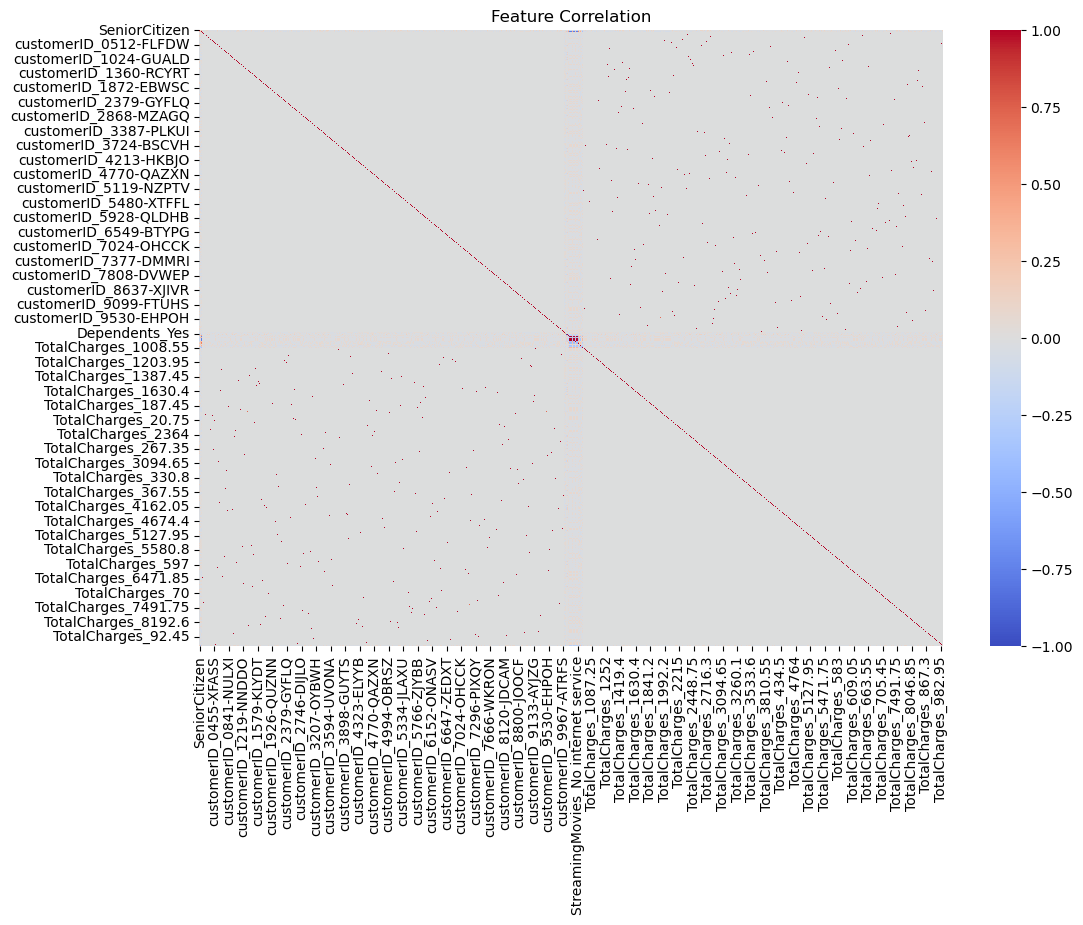

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), cmap='coolwarm')  # Removed annot=True
plt.title('Feature Correlation')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Feature and Target Split
X = data.drop(columns=["customerID", "Churn"])
y = data['Churn']


# Feature Selection using RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
X = X[selected_features]

print("Selected Features:", selected_features)


Selected Features: Index(['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [13]:
from imblearn.combine import SMOTEENN

# Balancing the data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print('Before balancing:', np.bincount(y))
print('After balancing:', np.bincount(y_resampled))


Before balancing: [5174 1869]
After balancing: [2752 3148]


In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Models
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Training
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained successfully!')


/home/asus/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:47:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained successfully!
[LightGBM] [Info] Number of positive: 2529, number of negative: 2191
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 4720, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535805 -> initscore=0.143466
[LightGBM] [Info] Start training from score 0.143466
LightGBM trained successfully!
CatBoost trained successfully!


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} Model Evaluation:')
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       561
           1       0.94      0.97      0.96       619

    accuracy                           0.95      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180

AUC-ROC: 0.9930570553966924

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       561
           1       0.94      0.98      0.96       619

    accuracy                           0.95      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180

AUC-ROC: 0.9933090287076793

CatBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       561
           1       0.95      0.97      0.96       619

    accuracy                           0.95

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'\n{name} Model Evaluation:')
    print(classification_report(y_test, y_pred))
    print('AUC-ROC:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       561
           1       0.94      0.97      0.96       619

    accuracy                           0.95      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180

AUC-ROC: 0.9930570553966924

LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       561
           1       0.94      0.98      0.96       619

    accuracy                           0.95      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180

AUC-ROC: 0.9933090287076793

CatBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       561
           1       0.95      0.97      0.96       619

    accuracy                           0.95

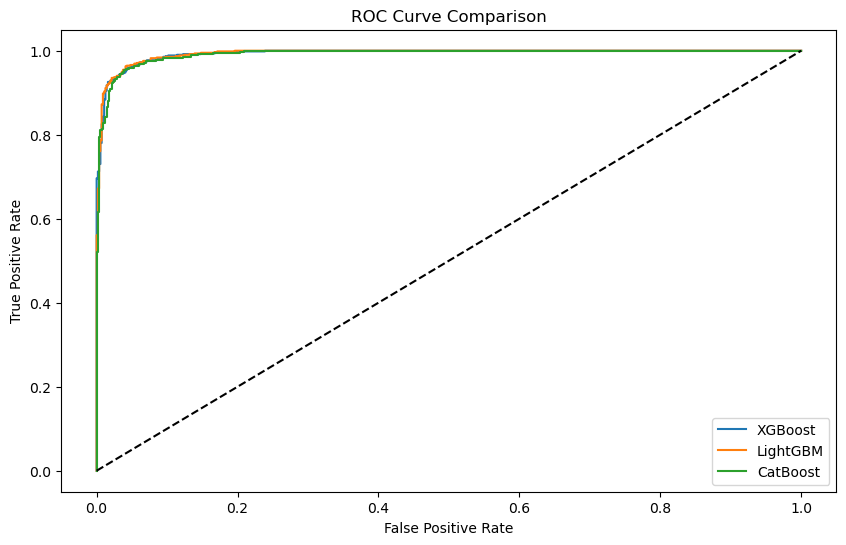

In [17]:
plt.figure(figsize=(10,6))

for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

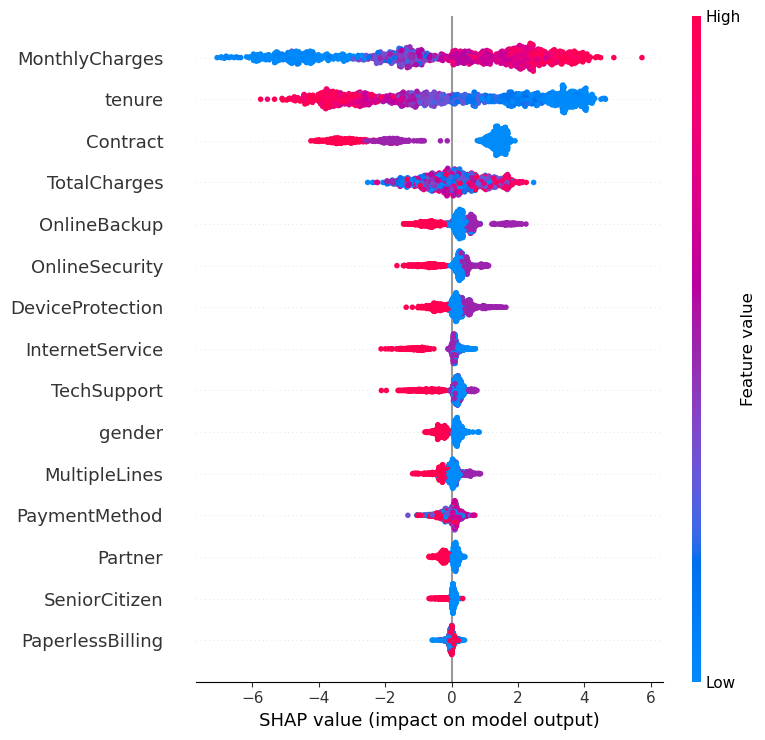

In [18]:
import shap

# SHAP values for best model (say XGBoost)
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [19]:
# Save the best model
import joblib
joblib.dump(models['XGBoost'], 'churn_model.pkl')

['churn_model.pkl']

In [20]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import os

# Load your dataset
df = pd.read_csv("/home/asus/Desktop/churn_project/customer_churn.csv")  # Adjust path if necessary

# Drop customerID if it exists (not used for modeling)
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# Initialize dictionary to hold encoders
label_encoders = {}

# Loop through categorical columns and fit LabelEncoders
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Save the encoders
os.makedirs("models", exist_ok=True)
joblib.dump(label_encoders, "models/label_encoders.pkl")

print("✅ label_encoders.pkl created and saved in models/")


✅ label_encoders.pkl created and saved in models/


In [21]:

joblib.dump(model, "models/xgboost_model.pkl")


['models/xgboost_model.pkl']

In [22]:
import pandas as pd
import numpy as np
import joblib

# Load model, encoders, features
model = joblib.load("models/churn_model.pkl")
label_encoders = joblib.load("models/label_encoders.pkl")
selected_features = joblib.load("models/selected_features.pkl")
data = pd.read_csv("customer_churn.csv")

# Get Customer ID
customer_id = input("Enter Customer ID: ")

# Try to find existing customer
existing = data[data['customerID'] == customer_id]

if not existing.empty:
    print("\n✅ Existing customer found in dataset.")
    input_df = existing.copy()
    input_df.drop(columns=['customerID', 'Churn'], inplace=True)
else:
    print("\n⚠️ Customer ID not found. Please enter details manually.\n")

    input_dict = {}
    input_dict['gender'] = input("Gender (Male/Female): ")
    input_dict['SeniorCitizen'] = int(input("SeniorCitizen (0 for No, 1 for Yes): "))
    input_dict['Partner'] = input("Partner (Yes/No): ")
    input_dict['tenure'] = int(input("Tenure (in months): "))
    input_dict['MultipleLines'] = input("MultipleLines (Yes/No/No phone service): ")
    input_dict['InternetService'] = input("InternetService (DSL/Fiber optic/No): ")
    input_dict['OnlineSecurity'] = input("OnlineSecurity (Yes/No/No internet service): ")
    input_dict['OnlineBackup'] = input("OnlineBackup (Yes/No/No internet service): ")
    input_dict['DeviceProtection'] = input("DeviceProtection (Yes/No/No internet service): ")
    input_dict['TechSupport'] = input("TechSupport (Yes/No/No internet service): ")
    input_dict['Contract'] = input("Contract (Month-to-month/One year/Two year): ")
    input_dict['PaperlessBilling'] = input("PaperlessBilling (Yes/No): ")
    input_dict['PaymentMethod'] = input("PaymentMethod (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)): ")
    input_dict['MonthlyCharges'] = float(input("MonthlyCharges: "))
    input_dict['TotalCharges'] = float(input("TotalCharges: "))

    input_df = pd.DataFrame([input_dict])

# Encode categorical columns
for col in input_df.columns:
    if col in label_encoders:
        le = label_encoders[col]
        input_df[col] = input_df[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
        if 'Unknown' not in le.classes_:
            le.classes_ = np.append(le.classes_, 'Unknown')
        input_df[col] = le.transform(input_df[col].astype(str))

# Select trained features
input_df = input_df[selected_features]

# Predict
pred = model.predict(input_df)[0]
proba = model.predict_proba(input_df)[0][pred] * 100
label = "Churn" if pred == 1 else "No Churn"

# Output
print(f"\n📌 Prediction for Customer ID {customer_id}")
print(f"➡️  Result: {label} ({proba:.2f}%)")


Enter Customer ID:  7590-VHVEG



✅ Existing customer found in dataset.

📌 Prediction for Customer ID 7590-VHVEG
➡️  Result: Churn (99.64%)
